# Build your first neural network (with Keras)
Neural networks are an area of machine learning that we are hearing a lot about right now... From speech recognition to image searching, autonomous cars and AlphaGo, many of the recent successes of artificial intelligence are based on deep neural networks.

## What is Keras ?
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.


### Install Keras

To install this package with conda run one of the following:
````
conda install -c conda-forge keras 
conda install -c conda-forge/label/cf201901 keras 
````

Or with pip3
````
sudo pip3 install keras
````

## What is the neural network ?
A neural network is a set of interconnected formal neurons that solves complex problems such as pattern recognition or natural language processing by adjusting weighting coefficients in a learning phase.


###  Operation of the neural network
A neural network is inspired by the functioning of biological neurons and takes shape in a computer as an algorithm.  
The neural network can modify itself according to the results of its actions, which allows learning and problem solving without algorithms, and therefore without traditional programming.

![biologic vs artificial neuron](./img/bioVSart.png)

For our purposes, we can model this neuron according to a set of inputs, which receives a weighted sum of these inputs using weights, adds bias and provides a number based on an activation function. 


![one neuron](./img/nl.png)

- **The weights** can be considered as a set of buttons that can be adjusted to obtain different outputs.  


- **Bias** can be considered as another button that decides when a neuron remains inactive or, in other words, to what extent the weighted sum must be high for the neuron to be significantly active.  


- **The activation function** We will see in more detail the next paragraph

### What is an activation function?  

The activation function was inspired by the "action potential", an electrical phenomenon between two biological neurons.

Let's start with a quick reminder of the biology class: A neuron has a cell body, an axon that allows it to send messages to other neurons and dendrites that allow it to receive signals from other neurons.

![Image de neuronne](./img/cn.jpg)

The neuron receives signals from other neurons through the dendrites. The weight associated with a dendrite, called synaptic weight, is multiplied by the incoming signal. Dendrite signals are accumulated in the cell body and if the resulting signal strength exceeds a certain threshold, the neuron transmits the message to the axon. Otherwise, the signal is killed by the neuron and does not spread any further. The action potential is therefore the variation in signal strength indicating whether or not communication should take place.

The activation function decides whether or not to transmit the signal. In this case, it is a simple function with only one parameter: the threshold. Now, when we learn something new, the threshold and connection probability (called synaptic weight) of some neurons change. This creates new connections between neurons, allowing the brain to learn new things.

Now let's see how all this works with an artificial neural network: The incoming values in a neuron (x1, x2, x3, ..., xn) are multiplied with their associated weights (reference to synaptic weight) (w1, w2, w3, ..., wn). These multipications are then summed and the bias (reference to the threshold) is added. The image below shows the calculation formula.

The purpose of activation is to transform the signal so as to obtain an output value from complex transformations between the inputs. To do this, the activation function must be non-linear. It is this non-linearity that makes it possible to create such transformations.

The most commonly used examples of activation functions are sigmoid, softmax, ReLU, tanh, etc.

![factivation functions](./img/reLU.png)

**Sigmoid :**  
The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

**Tanh or hyperbolic tangent :**  
Tanh is also like logistic sigmoid but better. The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped).The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.

**ReLU (Rectified Linear Unit) :**  
The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.

There are others that are less used. I'll let you check Google to find out.

### Structure of the network
Now that we know how a single neuron works, we can connect them together to form a network in the form of layers.  
So an artificial neural network is just an overrated composite function.

![multicouche](./img/multi.png)

A typical neural network consists of 3 types of layers:  

- **The input layer:** The given data points are fed into this layer. There can be only 1 input layer. The number of neurons in this layer is equal to the number of inputs. Let's imagine that in input there is a photo that is 28 pixels by 28 pixels. So we need 1 neuron per pixel, which makes 784 Neurons    


- **The hidden layers:** These are the layers that try to find patterns in the inputs to get the outputs we need. A network can have an unlimited number of hidden layers.  


- **The output layer:** This layer gives us the predictions of the network, ie. the outputs that the network thinks should be correct given its current parameters (weights and biases each neuron). The number of neurons in this layer is equal to the number of values we need to predict. Imagine that we want to create an algorithm that recognizes numbers. Since there are ten digits to recognize (0 to 9), there will be 10 neurons. 

![neural network](./img/3lnn.svg)

Let's see how to implement this

## Our dataset: handwritten digits

### Overview
The MNIST dataset was constructed from two datasets of the US National Institute of Standards and Technology (NIST). The training set consists of handwritten digits from 250 different people, 50 percent high school students, and 50 percent employees from the Census Bureau. Note that the test set contains handwritten digits from different people following the same split.

The MNIST dataset is publicly available at http://yann.lecun.com/exdb/mnist/ 

**But we use keras.datasets**  
keras has some methods to download some data known as Yann Lecun's the Dataset.  
Feel free to watch and play with the other datasets

- https://keras.io/datasets/

Before we create and train a model, we have to get some data. We'll be training our network to recognize images of handwritten digits - an easy task for a person, but it would be very difficult to write code that does the same thing without using machine learning.

We keep the training and test data separate so we can confirm that our model is able to make predictions on image that it never "saw" when it was being trained.

### Import some tools

In [50]:
import keras
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

When we download our data, `x_train_raw` will hold the images we'll be using to train our network, and `y_train_raw` will have the integers that are drawn in those images. Similarly, `x_test_raw` will have the images we'll use to test our accuracy and `y_test_raw` will hold the integers we're trying to find. 

They're suffixed with `_raw` because we'll need to do some preprocessing before we can use this data to train.

In [ ]:
# First we'll download the data.
# The data, shuffled and split between train and test sets.
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


**Exercise** : Let's see what we're working with here. Display the object type for ``x_train_raw`` and ``y_train_raw``.

In [6]:
### ENTER YOUR CODE HERE ###
print(type(x_train_raw), type(y_train_raw))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


The result should be ``<class 'numpy.ndarray'>``.  

**Exercise** : Displays the number of dimensions of ``x_train_raw`` and ``y_train_raw`` with the shape property.

In [7]:
nom = "didier"
print(f"MOn nom est {nom}")

MOn nom est didier


In [8]:
### ENTER YOUR CODE HERE ###
print(f"Shape of x_train_raw: {x_train_raw.shape}")
print(f"Shape of y_train_raw: {y_train_raw.shape}")

Shape of x_train_raw: (60000, 28, 28)
Shape of y_train_raw: (60000,)


The result should be : 
````
Shape of x_train_raw: (60000, 28, 28)
Shape of y_train_raw: (60000,)
````

The (60000, 28, 28) means there are 60,000 samples in x_train, and each sample is a 2D array with 28 rows and 28 columns.  
The (60000,) means there are 60,000 values (labels) in y_train.

Let's look at some of the images we'll be training on.
- Each one is 28 pixels by 28 pixels, and totally black and white.
- The 28 rows and 28 columns of numbers in the training data correspond to the 28 rows and 28 columns of pixels in the image.
- The darkness of each pixel is represented as a number in the training data, where 0 is a white pixel and 255 is a black pixel. 

Let's display the images with Matplotlib and the imgshow() method.  
Change the i variable to see other images. 

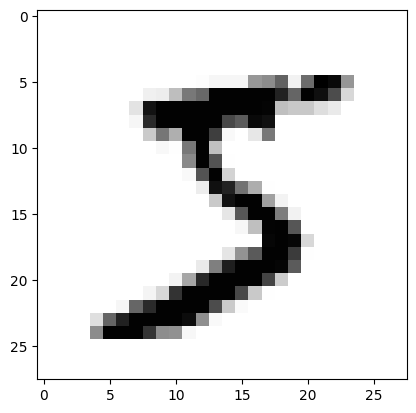

This image represents the number 5


In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Change the value of i and re-run this cell to look at different samples. There's 60,000 to choose from!
i = 0

plt.imshow(x_train_raw[i], cmap="Greys", interpolation="nearest")
plt.show()

print("This image represents the number", y_train_raw[i])

In [10]:
# This image equal this array
print(x_train_raw[i])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Preparing the data for training

#### Reshaping x

Our neural network will have 784 neurons in the input layer - one for each pixel in a sample image. To prepare the data for training we'll reshape `x_train_raw` and `x_test_raw` so that each sample is a 2D array. 

**Exercise :** Reshape `x_train_raw` and `x_test_raw` in  ``(60000, 784)`` and ``(10000, 784)``


In [ ]:
x_train_raw.flatten()
# non destructive returns copy

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
x_train_raw.reshape(len(x_train_raw), 28 * 28).shape
# on ne peut reshape que si c'est un vecteur ?
# 28 x 28 parce que c'est la résolution de l'image

(60000, 784)

In [ ]:
### ENTER YOUR CODE HERE ### (2 lines)
x_train = x_train_raw.reshape(len(x_train_raw), 28 * 28)
x_test = x_test_raw.reshape(len(x_test_raw), 28 * 28)

In [ ]:
# Let's see what we're working with here
print("Shape of x_train_raw:", x_train.shape)
print("Shape of y_train_raw:", x_test.shape)

Shape of x_train_raw: (60000, 784)
Shape of y_train_raw: (10000, 784)


In [15]:
x_train[i]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

#### Rescaling x

We'll also rescale the values of `x_train` and `x_test` to be between 0 and 1.
Scaling the data speeds up training.

In [ ]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [17]:
x_train[i]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Now all RGB's values have been converted to values ranging from 0 to 1.

#### Categorical encoding y

We'll also change the values of `y_train` and `y_test` from integers to a categorical encoding. The new values will be arrays of length 10, where all the values are 0 except where the index is the desired number, which will be 1. For example, if the number represented in the image was 2, the cateorical encoding would be `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]` (since the third position has index 2).

Why did we do this? This way our output layer will have 10 neurons, where each neuron corresponds to a different number.
![target](./img/target.png)

In the case of this image, it's 6

**Exercice :** Convert `y_train_raw` and `y_test_raw` to binary class matrices with [to_categorical method](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)

In [18]:
y_train_raw

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
from keras.utils import to_categorical

to_categorical(y_train_raw).shape

(60000, 10)

In [ ]:
from keras.utils import to_categorical

### Convert `y_train_raw` and `y_test_raw` to binary class matrices
### ENTER YOUR CODE HERE ### (2 lines)
y_train = to_categorical(y_train_raw)
y_test = to_categorical(y_test_raw)

### END ###

In [21]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


---
## Building the neural network

It's time for you to build your network! Here's a brief overview of how to work with Keras to get you started.

The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the [Sequential model](https://keras.io/models/sequential/), a linear stack of layers. For more complex architectures, you should use the Keras functional API, which allows to build arbitrary graphs of layers.


**Exercise :** Create a new model by calling ```Sequential```

In [22]:
### ENTER YOUR CODE HERE ### (1 line)
model = Sequential()

#### Add hidden layer
[Dense](https://keras.io/layers/core/#dense) layers are fully connected, with each neuron in the previous layer being connected to each neuron in the new layer. The number you pass as an argument is the number of new neurons that are created.

![dense layer](./img/dense.png)

Since the input layer doesn't actually do anything, the first layer you create with Keras is really the first *hidden* layer. It has to know how many inputs to expect, which you can specify with `input_shape`. After the first layer, no other layer needs `input_shape`.

Use ``Dense()`` object.  

**Exercise :** Add ``Dense()`` layer in your model with `model.add(`layer`)`. Don't forget to indicate the number of inputs, in our case 784 entries ! EX :  ``input_shape=(784, )``. Your Dense layer must contain 10 neurons

[Refer to the documentation.](https://keras.io/layers/core/#dense)

In [45]:
### ENTER YOUR CODE HERE ### (1 line)
model = Sequential()

### ENTER YOUR CODE HERE ### (1 line)
# model.add(Dense(10, input_shape=(784,)))

model.add(keras.Input(shape=(784,)))
model.add(Dense(10))

#### After adding a `Dense` layer, add an [Activation](https://keras.io/activations/) layer.

This layer represents the activation functions for all the neurons in the layer before it. There are plenty of choices of actiation functions: `'sigmoid'`, `'hard_sigmoid'`, `'relu'`, `'softplus'`, `'tanh'`, `'softsign'`, `'softmax'`, `'elu'`, `'selu'`, and `'linear'`. If you're curious about what these activation functions look like, google is your friend!

**Exercise :** Add an [Activation](https://keras.io/activations/) layer with ``softmax`` parameter. 

In [24]:
### ENTER YOUR CODE HERE ### (1 line)
model.add(Activation("softmax"))

We will already try to see what our model gives with a single layer and there "softmax" activation function !

### Compiling the model
Once the model is built, it has to be compiled with `model.compile`
These are added during the model's compile step:

- *Optimizer* : his is how the model is updated based on the data it sees and its loss function. The `'optimizer'` is the strategy you want to use to find the right weights and biases for your model. A solid go-to choice is `'adam'`, but there are many others: `'sgd'`, `'rmsprop'`, `'adagrad'`, `'adadelta'`, `'adamax'`, and `'nadam'`.

- *Loss function* : This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction. The `loss` argument describes the way you want the optimizer to gauge the correctness of the model. We'll be using `'categorical_crossentropy'` for this model.

- *Metrics* : Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [ ]:
model.compile(
    loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=["accuracy"]
)

### Training the model

We'll be using the data in `x_train` and `y_train` to fit the weights and biases in our model. 

The number of `epochs` is the number of times the model trains on every sample of the training set. More epochs means the model gets more opportunities to learn from the data, but it means the model takes longer to train. 

Too many epochs can also lead to *overfitting*, where instead of learning a general solution to the problem, the model essentially "memorizes" the answers for the examples it was trained on. If this happens, the accuracy on the training set is very high, while the accuracy on the test set is low. This is one of the reasons we keep the training and test sets separate, so we can tell if our model has been overfit.


**Exercise :** Use the data in `x_train` and `y_train` to fit in our model. Change the number of epochs to improve your model. But normally, a maximum of 80 epochs should be used here.

In [48]:
### ENTER YOUR CODE HERE ### (1 line)
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1733 - loss: 9.3901
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1964 - loss: 10.7945
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1528 - loss: 10.2221
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1805 - loss: 9.1753
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1862 - loss: 9.2633
Epoch 6/30
1407/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2038 - loss: 9.0801

KeyboardInterrupt: 

### Evaluating the model

There's a lot of different ways to evaluate a model's performance after it's been trained. One of the most straightforward ways is to look at its accuracy, which is the percent of samples it predicted correctly.

We'll use the test set data (that wasn't used during training) to calculate you model's accuracy.

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

predictions = model.predict(x_test)
print(
    "Accuracy: %",
    accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)) * 100,
)

correct_preds = y_test.argmax(axis=1) == predictions.argmax(axis=1)
print(
    "That means that out of",
    y_test.shape[0],
    "test samples, this model got",
    np.where(correct_preds)[0].size,
    "correct and",
    np.where(~correct_preds)[0].size,
    "incorrect",
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: % 18.990000000000002
That means that out of 10000 test samples, this model got 1899 correct and 8101 incorrect


You should get a result that should be within 92% accuracy. With a single layer !  
Let's try to see what it looks like if it adds depth. 

**Exercise :** Add a ``Dense`` layer that contains 50 neurons and uses the "sigmoid" activation function. Add this layer **before** the one we created previously!

In [ ]:
model2 = Sequential()

### ENTER YOUR CODE HERE ### (1 or 2 lines)


### END
model2.add(Dense(10))
model2.add(Activation("softmax"))

### Compiling the model (again)

In [ ]:
# The compiling step. Pick your optimizer!
model2.compile(optimizer="adam", loss="categorical_crossentropy")

### Training the model (again)

In [30]:
model2.fit(x_train, y_train, epochs=40)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7166
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3106
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2784
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2685
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2692
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2631
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2600
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2616
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2508
Epoch 10/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2454
Epoch 11/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2497
Epoch 12/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2470
Epoch 13/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2463
Epoch 14/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2440
Epoch 15/40
1875/1875 ━━━━━━━

### Evaluating the model (again)

In [31]:
predictions2 = model2.predict(x_test)
print(
    "Accuracy: %",
    accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)) * 100,
)

correct_preds2 = y_test.argmax(axis=1) == predictions2.argmax(axis=1)
print(
    "That means that out of",
    y_test.shape[0],
    "test samples, this model got",
    np.where(correct_preds)[0].size,
    "correct and",
    np.where(~correct_preds)[0].size,
    "incorrect",
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: % 92.67
That means that out of 10000 test samples, this model got 9267 correct and 733 incorrect


You should have gotten something close to this:

````
Accuracy: % 96.31

That means that out of 10000 test samples, this model got 9631 correct and 369 incorrect
````

### Analyze the errors 

We can also assess the model's performance with a confusion matrix. In this matrix, rows and columns represent actual numbers and predicted numbers for each sample of the test set. 

Example : 

- If the number 900 is at row 6 and column 6 of the confusion matrix, that means that there were 900 samples where model predicted that the image was a drawing of a 6 and it was right
- If the number 17 is at row 4 and column 9, that means that there were 17 times where the model predicted a 9, but the image was actually showing a 4

In this heatmap, a diagonal stripe represents all the samples the model got right: when it predicted 0 for a 0, 1 for a 1, etc. Every other part of the matrix represents samples that the model got wrong.

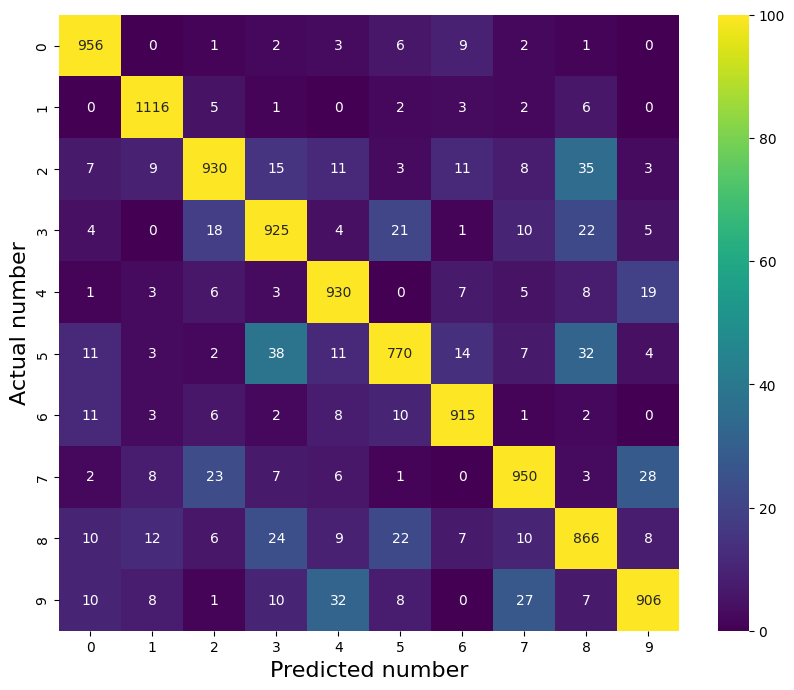

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test.argmax(axis=1), predictions2.argmax(axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, cmap="viridis", vmax=100, annot=True, fmt="g")
plt.gca().set_xlabel("Predicted number", fontsize=16)
plt.gca().set_ylabel("Actual number", fontsize=16)
plt.show()

This visualization is included just because I thought it was  interesting :)

Each time the neural net makes a prediction every neuron in the output layer outputs a number. The highest number is chosen as the neural network's prediction, but we can inspect all the outputs to get an idea of what the neural network's second or third choice might have been.

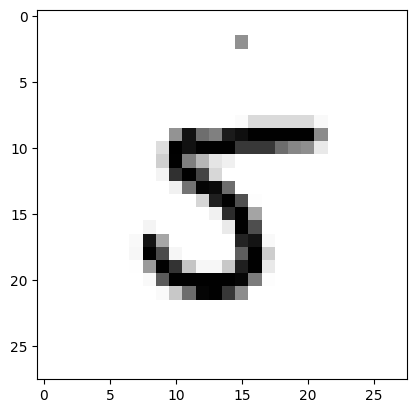

This image represents the number 5

Your model ranked its predictions this way: 

1 	Score: 87.66735
5 	Score: 7.46983
2 	Score: 2.96191
6 	Score: 0.95816
4 	Score: 0.69911
3 	Score: 0.19419
8 	Score: 0.03204
0 	Score: 0.01131
7 	Score: 0.00499
9 	Score: 0.00111


In [ ]:
# Every time you run this cell, a random sample will be chosen from the ones that your model made the wrong prediction on

i = np.random.choice(np.where(~correct_preds)[0])

plt.imshow(x_test_raw[i], cmap="Greys", interpolation="nearest")
plt.show()

print("This image represents the number", y_test_raw[i])
print()
print("Your model ranked its predictions this way: \n")
for num, score in sorted(
    list(enumerate(predictions[i])), key=lambda pair: pair[1], reverse=True
):
    print(num, "\tScore: {0:.5f}".format((score) * 100))

### Save your model

In [34]:
model2.save("model.h5")

## Go further 
You could try adding layers to get an even better score ? 
Look [here](https://keras.io/layers/core/), maybe some layers can help you! 

### To read :
[Selecting the Best Architecture for Artificial Neural Networks](https://heartbeat.fritz.ai/selecting-the-best-architecture-for-artificial-neural-networks-7b051f775b4)


**Code Documentation:**  
* `batch_size` number of images per loop step
* `epochs` number of train loops
* `num_classes` there are 10 digits 0-9
* `x_train.astype('float32')` trains faster than int
* `x_train /= 255` from 0-255 to 0-1
* `verbose=1` 1 for progress bar logging

### Keras Documentation:  
* [to_categorical](https://keras.io/utils/#to_categorical) aka one_hot
* [Dense](https://keras.io/layers/core/#dense)
* [Flatten](https://keras.io/layers/core/#flatten)